In [1]:
import networkx as nx
import sys
sys.path.append(r"C:\Users\egbonsisi\ControllerPlacementCodes\Skoltech-PhD-Thesis\_codes\SIR\Influential-nodes-identification-in-complex-networks-via-information-entropy")
from algorithms import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pickle

In [2]:
data = 'topo'# 'amazon'
data_file = data
G = clean_data(data_file)

In [3]:
r = [0.8, 0.1, 0.4, 0.2, 0.3, 0.5]
topk_list = [round(nx.number_of_nodes(G) * k) for k in r]
print(topk_list)

[27, 3, 14, 7, 10, 17]


In [4]:
geo_loc_data = get_geo_data("Internet2LatLong.csv")
edge_geo_data_combined = assign_location(G, geo_loc_data)
# set edge attributes
set_edge_attr(G, edge_geo_data_combined)
# obtain the node degrees and edges weights to desired lengths
tmp_t = list(range(1, 5))
tmp_t_SN, tmp_t_hub = hubs_SN_NS(G, tmp_t)
# unpack the nodes and edges
tmp_t_SN_1, tmp_t_SN_2, tmp_t_SN_3, tmp_t_SN_4 = tmp_t_SN
tmp_t_hub_1, tmp_t_hub_2, tmp_t_hub_3, tmp_t_hub_4 = tmp_t_hub
# determine variables values
k_max, k_min, k_2_max, k_2_min, sigma, delta = maxi_mini(
    tmp_t_SN_1[1], tmp_t_hub_2[2])
# assign various probability weights
w_d_h, w_d_2_h, w_d_l, w_d_2_l, w_d_t, w_d_2_t = probability_weights(
    tmp_t_SN_1[1], tmp_t_hub_2[2], k_max, k_min, k_2_max, k_2_min, sigma, delta)
# combine into a dictionary
combined_dict, combined_dict_k_2 = covert_to_dict(
    w_d_h, w_d_l, w_d_t), covert_to_dict(w_d_2_h, w_d_2_l, w_d_2_t)
# print(combined_dict, "\n ...... \n", combined_dict_k_2)

# Get ranked result
opti_rank, ranked_nodes = rank_result(combined_dict, combined_dict_k_2)

print(opti_rank, "\n ...... \n", ranked_nodes)


[('27', 0.9985005730418679), ('5', 0.7549436527724699), ('12', 0.75434887813017), ('28', 0.6538494099071029), ('2', 0.5865976594398602)] 
 ...... 
 [('27', 0.9985005730418679), ('5', 0.7549436527724699), ('12', 0.75434887813017), ('28', 0.6538494099071029), ('2', 0.5865976594398602), ('8', -0.050453003066369795), ('29', -0.08741203815217125), ('11', -0.09476383267522936), ('33', -0.1785220459582076), ('16', -0.17915011452858887), ('22', -0.21433411540053987), ('14', -0.26103242352740835), ('24', -0.2741646003757832), ('26', -0.3314800344449304), ('7', -0.34776492282853405), ('21', -0.4675182149424362), ('6', -0.5222256043810737), ('23', -0.6131195019583244), ('13', -0.657028903456349), ('32', -0.7094072525888995), ('3', -0.7305873447843267), ('34', -0.7897546865705557), ('15', -0.7933125112241983), ('31', -0.7953706107202866), ('25', -0.797530665360725), ('17', -0.79836359602605), ('19', -0.8073718135156049), ('10', -0.8165377332519864), ('9', -0.8454161947787605), ('4', -0.87157033857

In [5]:
max_ = r[3]
max_topk = round(max_ * nx.number_of_nodes(G))
print(max_topk)

degreerank = degree(G, max_topk)
print('done!')
degreerank_non = degree_non(G, max_topk)
print('done!')

# vote = voterank(G, max_topk)
# print('done!')
# vote_non = voterank_non(G, max_topk)
# print('done!')

newmethod_rank = EnRenewRank(G, max_topk, 2)
print('done!')

kshell_rank = kshell(G, max_topk)
print('done!')
kshell_rank_non = kshell_non(G, max_topk)
print('done!')
max_

7
done!
done!
done!
done!
done!


0.2

## compute the average shortest path in the initial node set

In [6]:
degree_ls = [get_ls(G, [x[0] for x in degreerank[:k]]) for k in topk_list]
degree_non_ls = [get_ls(G, [x[0] for x in degreerank_non[:k]]) for k in topk_list]
# voterank_ls = []
# voterank_non_ls = []
new_methed_ls = [get_ls(G, [x[0] for x in newmethod_rank[:k]]) for k in topk_list]
# new_methed_non_ls = []
kshell_ls = [get_ls(G, [x[0] for x in kshell_rank[:k]]) for k in topk_list]
kshell_non_ls = [get_ls(G, [x[0] for x in kshell_rank_non[:k]]) for k in topk_list]
evbrM_ls = [get_ls(G, [x[0] for x in ranked_nodes[:k]])for k in topk_list]
# evbrM_ls
print(kshell_non_ls, evbrM_ls)


[4.476190476190476, 3.6666666666666665, 4.476190476190476, 4.476190476190476, 4.476190476190476, 4.476190476190476] [4.327635327635328, 5.333333333333333, 4.032967032967033, 4.571428571428571, 4.4, 4.139705882352941]


NameError: name 'degree_ls' is not defined

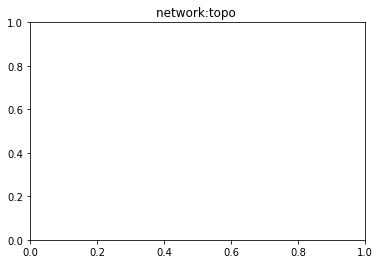

In [13]:
%matplotlib inline
plt.title('network:{} '.format(data_file))
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), degree_ls, 'r-o', label='degree', linewidth=1.0, )
#plt.plot(np.array(topk_list) / nx.number_of_nodes(G), degree_non_ls, 'r--o', label='degree_non', linewidth=1.0, )
#plt.plot(np.array(topk_list) / nx.number_of_nodes(G), voterank_ls, 'y-s', label='vote', linewidth=1.0, )
#plt.plot(np.array(topk_list) / nx.number_of_nodes(G), voterank_non_ls, 'y--s', label='vote_non', linewidth=1.0, )
#plt.plot(np.array(topk_list) / nx.number_of_nodes(G), kshell_ls, 'g-p', label='kshell', linewidth=1.0, )
#plt.plot(np.array(topk_list) / nx.number_of_nodes(G), kshell_non_ls, 'g--p', label='kshell_non', linewidth=1.0, )
#plt.plot(np.array(topk_list) / nx.number_of_nodes(G), new_methed_ls, 'b-^', label='EnRenew', linewidth=1.0, )
# plt.plot(np.array(topk_list) / nx.number_of_nodes(G), new_methed_non_ls, 'b--^', label='EnRenew_non', linewidth=1.0, )
#plt.plot(np.array(topk_list) / nx.number_of_nodes(G), evbrM_ls, 'c--o', label='evbrM', linewidth=1.0, )
plt.legend()
plt.show()